In [31]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.python.framework import ops
# ops.reset_default_graph()

In [33]:
iris = pd.read_csv('data.csv')

In [34]:
iris.shape

(101, 26)

In [35]:
iris.head()

,likelyhood,breach,trade,evidence,property,public,opponents,constitution,fiduciary,confusion,...,constitutional,unregistered,contract,drugs,proprietor,similar,penalty,company,criminal,Label
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
iris = iris.sort_values(by=['Label'])

In [37]:
iris.head()

,likelyhood,breach,trade,evidence,property,public,opponents,constitution,fiduciary,confusion,...,constitutional,unregistered,contract,drugs,proprietor,similar,penalty,company,criminal,Label
100,0,2,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,-1
72,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1
71,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,-1
70,0,2,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,2,0,-1
69,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,3,-1


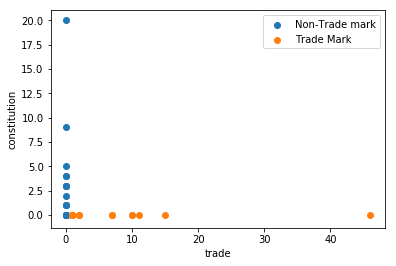

In [38]:
plt.scatter(iris[:50].trade, iris[:50].constitution, label='Non-Trade mark')
plt.scatter(iris[50:].trade, iris[50:].constitution, label='Trade Mark')
plt.xlabel('trade')
plt.ylabel('constitution')
plt.legend(loc='best')

In [39]:
X = iris.drop(labels=['Label'], axis=1).values
Y = iris.Label.values

In [40]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [41]:
trainIndex = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [42]:
testIndex = np.array(list(set(range(len(X))) - set(trainIndex)))
trainX = X[trainIndex]
trainY = Y[trainIndex]
testX = X[testIndex]
testY = Y[testIndex]

In [43]:
def min_max_normalized(data):
    colMax = np.max(data, axis=0)
    colMin = np.min(data, axis=0)
    return np.divide(data - colMin, colMax - colMin)

In [44]:
# trainX = min_max_normalized(trainX)
# testX = min_max_normalized(testX)

In [45]:
W = tf.Variable(tf.random_normal(shape=[25, 1]), name='W')
b = tf.Variable(tf.random_normal(shape=[1, 1]), name= 'b')
init = tf.global_variables_initializer()

In [46]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 25])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [47]:
# Declare the model you need to learn
model = tf.matmul(data, W) + b

In [48]:
# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(W))

In [49]:
# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha
alpha = tf.constant([0.01])
# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model, target))))
# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [50]:
# Declare prediction function
prediction = tf.sign(model)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, target), tf.float32))

In [51]:
# Declare optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
goal = optimizer.minimize(loss)

In [52]:
sess = tf.Session()
sess.run(init)

In [66]:
batch_size = 10
iter_num = 1000

In [67]:
loss_trace = []
train_acc = []
test_acc = []

In [68]:
for epoch in range(iter_num):
    batchIndex = np.random.choice(len(trainX), size=batch_size)
    batchTrainX = trainX[batchIndex]
    batchTrainY = np.matrix(trainY[batchIndex]).T
    sess.run(goal, feed_dict={data: batchTrainX, target: batchTrainY})

    temp_loss = sess.run(loss, feed_dict={data: batchTrainX, target: batchTrainY})
    temp_train_acc = sess.run(accuracy, feed_dict={data: trainX, target: np.matrix(trainY).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: testX, target: np.matrix(testY).T})
    
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

    if (epoch + 1) % 30 == 0:
        print('Epoch: {:d} loss: {:s} train_acc: {:s} test_acc: {:s}'.format(epoch + 1, str(temp_loss), str(temp_train_acc), str(temp_test_acc)))

Epoch: 30 loss: [0.1493012] train_acc: 1.0 test_acc: 0.95
Epoch: 60 loss: [0.14763966] train_acc: 1.0 test_acc: 0.95
Epoch: 90 loss: [0.14599782] train_acc: 1.0 test_acc: 0.95
Epoch: 120 loss: [0.14445552] train_acc: 1.0 test_acc: 0.95
Epoch: 150 loss: [0.14281194] train_acc: 1.0 test_acc: 0.95
Epoch: 180 loss: [0.14122762] train_acc: 1.0 test_acc: 0.95
Epoch: 210 loss: [0.13970213] train_acc: 1.0 test_acc: 0.95
Epoch: 240 loss: [0.1382353] train_acc: 1.0 test_acc: 0.95
Epoch: 270 loss: [0.13662614] train_acc: 1.0 test_acc: 0.95
Epoch: 300 loss: [0.13515513] train_acc: 1.0 test_acc: 0.95
Epoch: 330 loss: [0.13370213] train_acc: 1.0 test_acc: 0.95
Epoch: 360 loss: [0.13226698] train_acc: 1.0 test_acc: 0.95
Epoch: 390 loss: [0.1308484] train_acc: 1.0 test_acc: 0.95
Epoch: 420 loss: [0.12948714] train_acc: 1.0 test_acc: 0.95
Epoch: 450 loss: [0.12802212] train_acc: 1.0 test_acc: 0.95
Epoch: 480 loss: [0.12676539] train_acc: 1.0 test_acc: 0.95
Epoch: 510 loss: [0.12538229] train_acc: 1.0 t

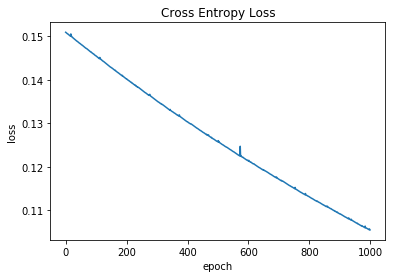

In [69]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

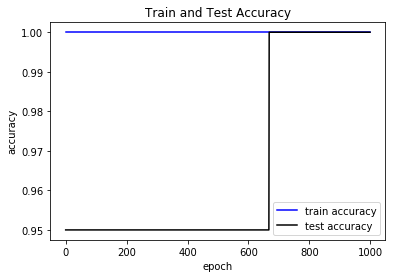

In [70]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [71]:
sess.run(W)

array([[-1.234352  ],
       [-1.0965089 ],
       [ 0.9574655 ],
       [ 0.07142846],
       [ 0.18221012],
       [-1.110761  ],
       [ 0.49294937],
       [-0.5562565 ],
       [-0.27289093],
       [-0.3349833 ],
       [ 0.2631448 ],
       [-0.32123747],
       [ 1.0309917 ],
       [ 0.5341499 ],
       [-1.1661073 ],
       [-0.22655593],
       [-0.3114538 ],
       [ 0.50718987],
       [-0.9014772 ],
       [ 0.533391  ],
       [-0.1640348 ],
       [ 0.3487134 ],
       [-0.2405224 ],
       [ 0.54387933],
       [-0.12337092]], dtype=float32)

In [72]:
sess.run(b)

array([[-0.99959964]], dtype=float32)